# AI coursework


using the mush.csv dataset.
we will do binary classification with the three algorithms

- tree decision thing
- logistic regression
- k nearest thing


## Used Libraries

In [3]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('./mush.csv')
print("data set : ", dataset.shape)

data set :  (8416, 23)


Now that we have imported the (extended) dataset into the Pandas Dataframe `dataset` we can do some EDA
# Exploratory Data Analysis 

In [5]:
edible = dataset[dataset['edibility']=='EDIBLE'].shape[0]
poison = dataset[dataset['edibility']=='POISONOUS'].shape[0]
print("edible count: "+str(edible) + "(" + str(edible/dataset.shape[0] * 100) + "%)")
print("poison count: "+str(poison) + "(" + str(poison/dataset.shape[0] * 100) + "%)")

edible count: 4488(53.326996197718636%)
poison count: 3928(46.67300380228137%)


## Frequency Counts for each attribute

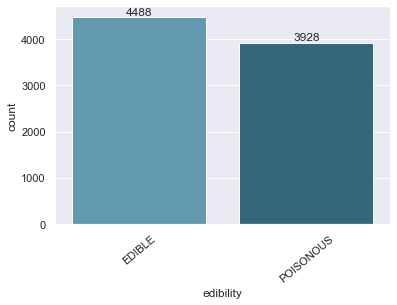

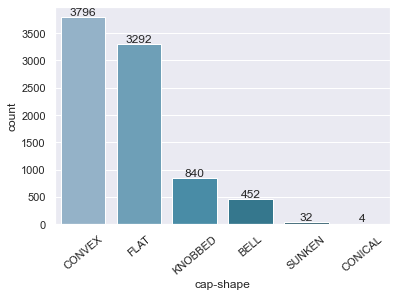

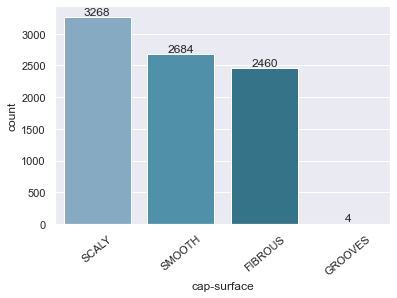

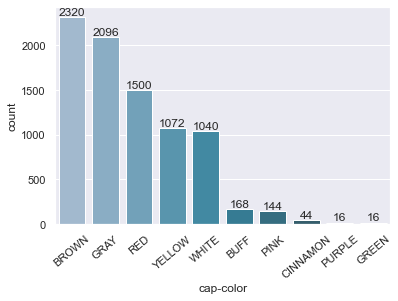

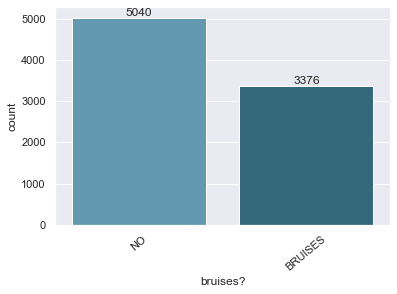

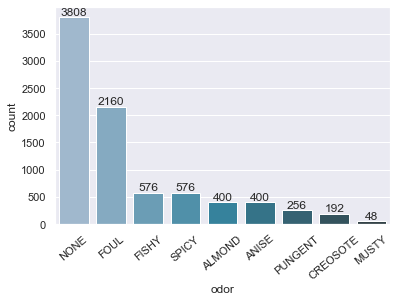

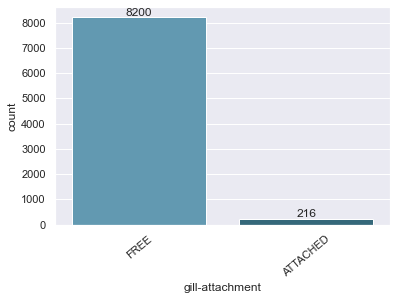

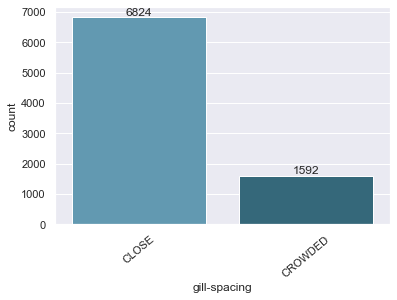

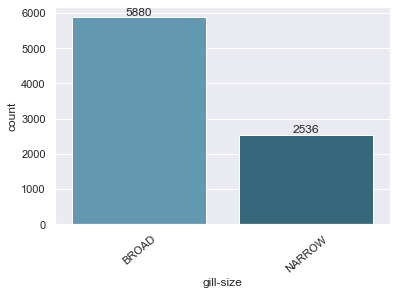

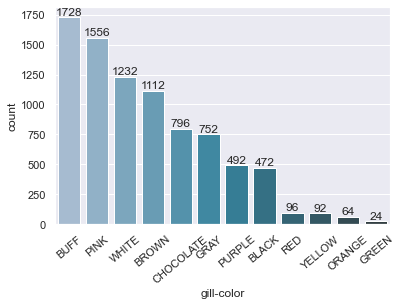

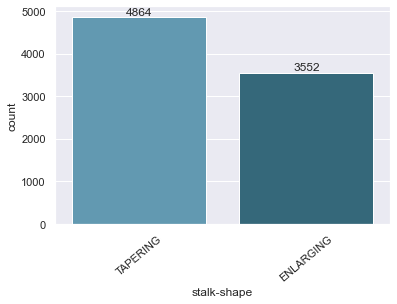

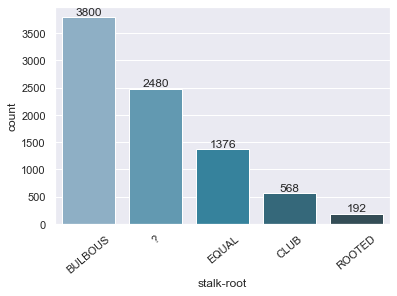

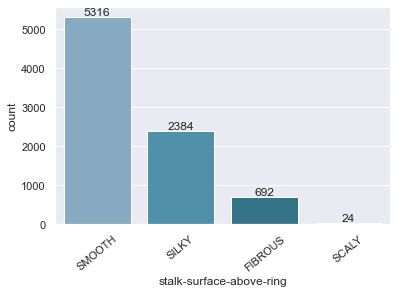

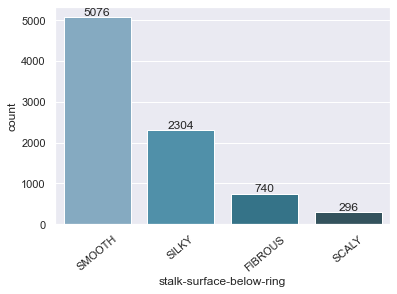

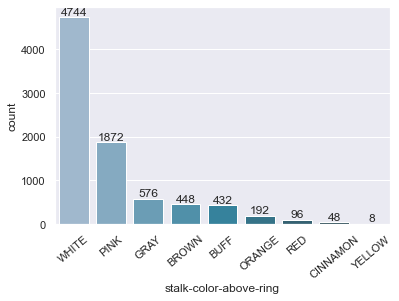

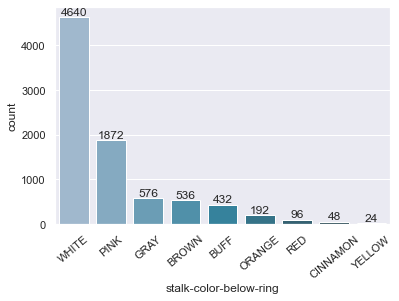

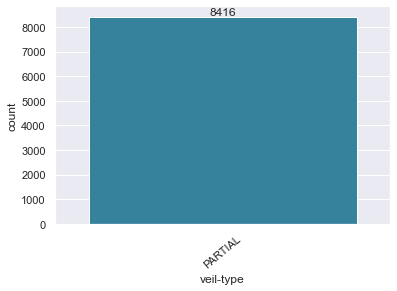

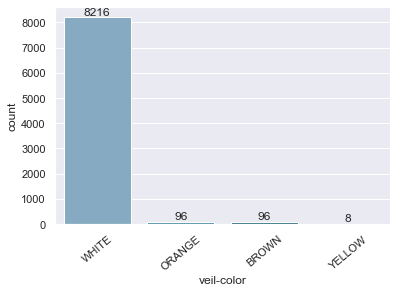

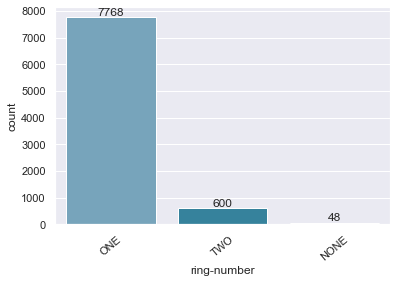

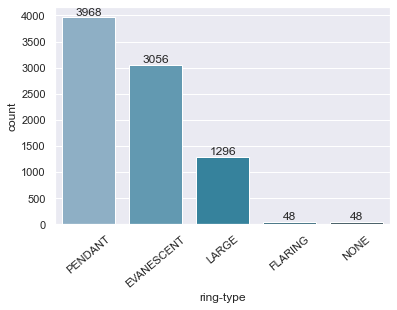

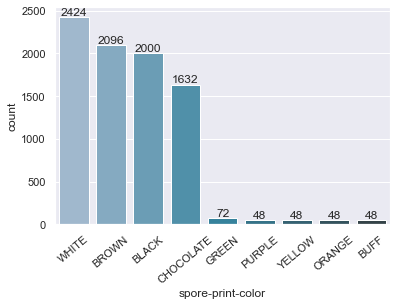

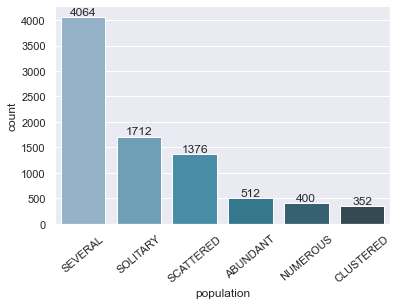

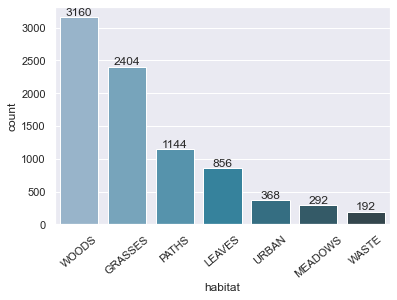

In [6]:
columns = dataset.columns
for col in columns:
    #series = dataset[col].value_counts()
    #print(series)
    #print("null values = " + str(dataset[col].isnull().sum()))
    #print("\n")
    
    sns.set_theme()
    plot = sns.countplot(x=dataset[col], order=dataset[col].value_counts(ascending=False).index, palette = "PuBuGn_d");
    
    
    abs_values = dataset[col].value_counts(ascending=False)
    lbls = [f'{p[0]}' for p in zip(abs_values)]
    plot.bar_label(container=plot.containers[0], labels=lbls)
    
    plot.set_xticklabels(plot.get_xticklabels(), rotation=40)

    plt.show()
    if col == "bruises?":
        col = "bruises"
    
    # To save new copies of the attribute Bar charts
    # plot.figure.savefig("Graphs/FrequencyBar/"+col+".png", bbox_inches='tight')
    
    

## Redundant attribute
If we go through, we can see that attribute #16 'veil-type' is a useless attribute since all $8416$ rows have the same value. So, we can remove this column since it will do nothing but take up time. Now, we are down to 22 columns (including the `edibility` column)

In [7]:
dataset = dataset.drop(['veil-type'], axis = 1)

## Missing data
Here we have printed out the the sums of all the values in each column, as well as a count of the number of null values in each. 
Since the null values in attribute $#11$ are represented by the string `'?'`, they are not registered as a null value by pandas.

In [8]:
dataset = dataset.replace("?", np.NaN)
dataset.isnull().sum()

edibility                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now that the missing values have been correctly replaced with the Pandas `NaN` indicator, we can deal with thees datapoints how we see fit.


Two options would be to either delete the column with the missing data (`stalk-root` attribute $#11$) or delete the rows with the missing data

By deleting the Column with the missing data, we will still have $8416$ entries, and only $21$ columns to work with (including edibility)

On the other hand, by deleting the Rows with the missing values, we will keep $22$ columns but will go down to $5936$ columns

In [9]:
# To delete rows with missing data
# dataset.dropna(axis=0)

# To delete attribute #11
dataset = dataset.dropna(axis=1)
dataset.shape


(8416, 21)

Now, we can do some more EDA, here we are going to create cross tabluations of each attribute with the output.

## Cross Tabulations and $\chi ^2$ tests

Additionally, we have calculated the $\chi^2$-test for independence $p$ values for each attribute against the output edibility

Reminder that the chi squared test is used for a hypothesis test. In this case, the Hypothesis $H_0$ will be "attribute 1 and attribute 2 are independent", when our $p$ values are lower than 0.05, we can be 95% sure that $H_0$ is false.

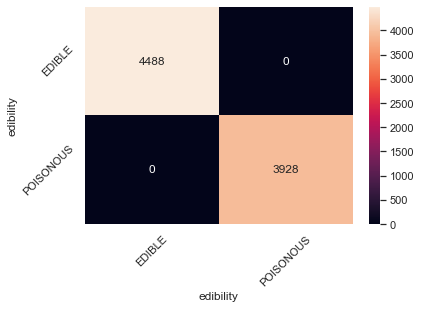

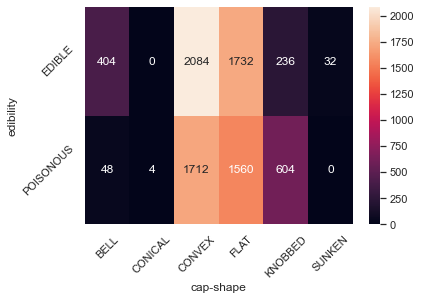

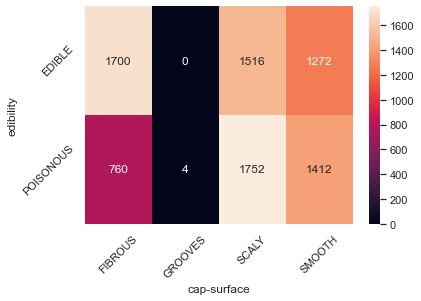

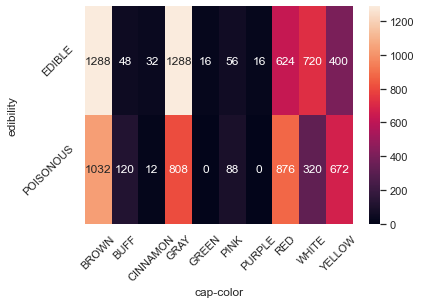

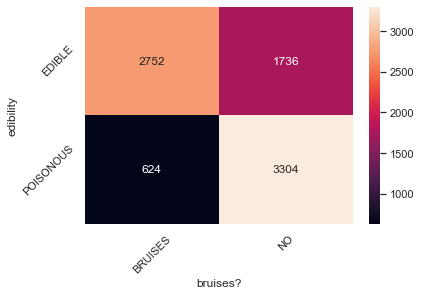

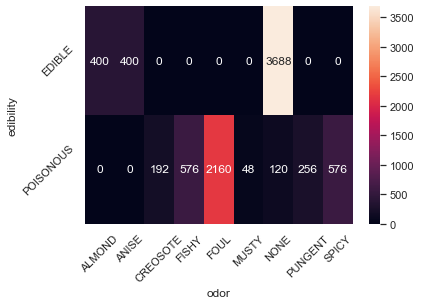

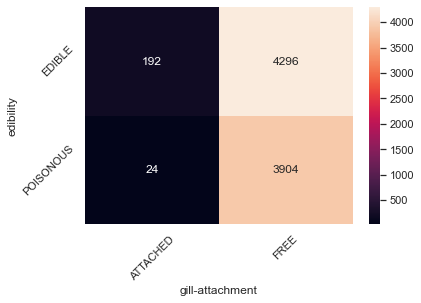

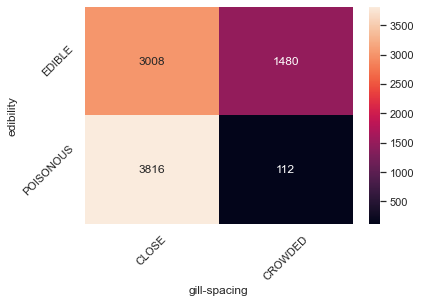

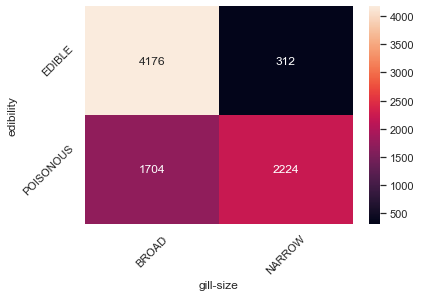

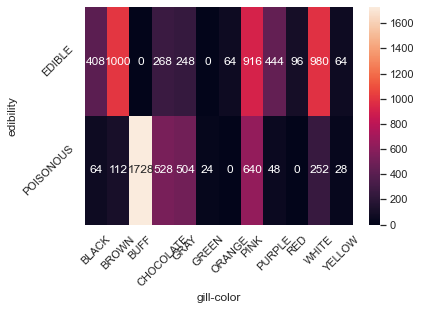

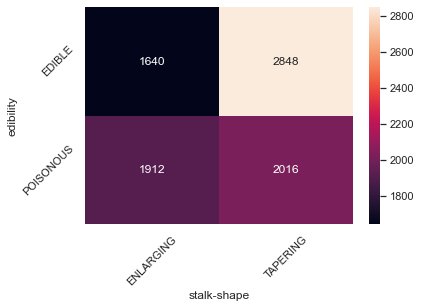

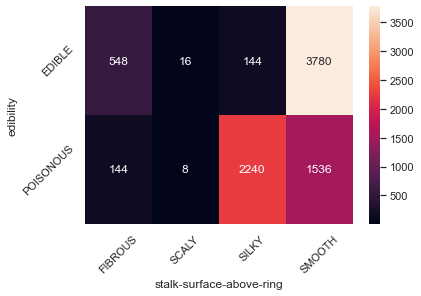

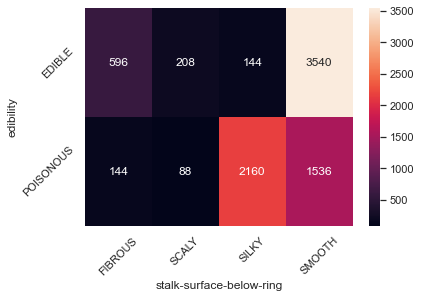

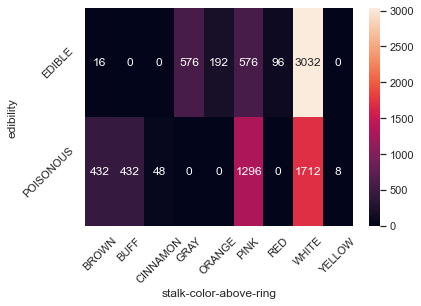

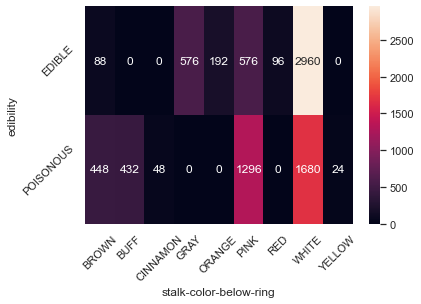

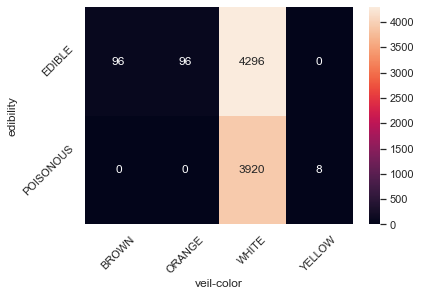

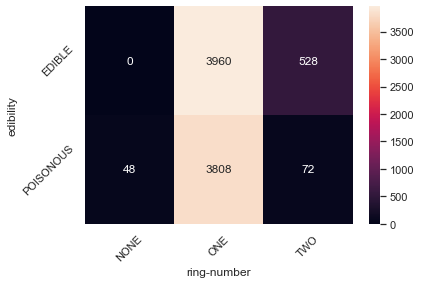

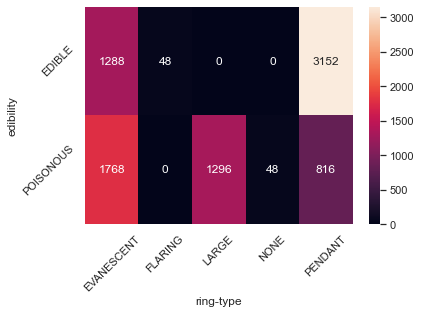

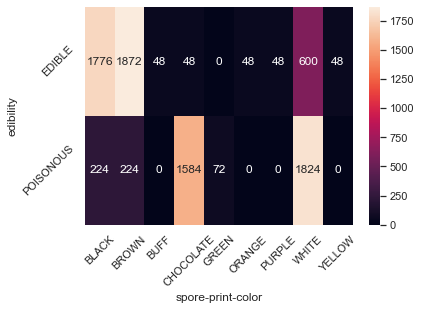

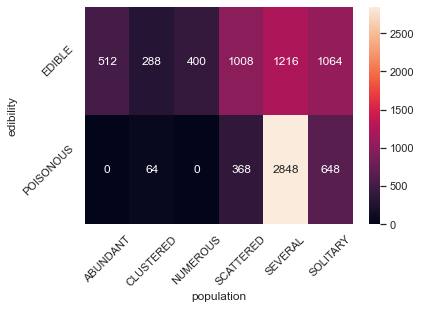

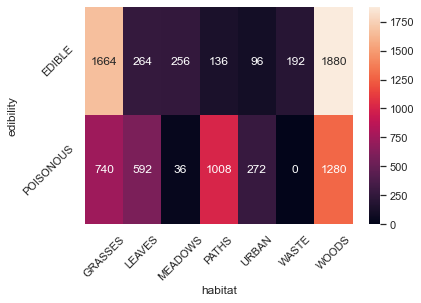

                                p value
edibility                  0.000000e+00
cap-shape                 3.187210e-103
cap-surface                5.996665e-76
cap-color                  1.168726e-90
bruises?                   0.000000e+00
odor                       0.000000e+00
gill-attachment            5.401073e-26
gill-spacing              4.427957e-271
gill-size                  0.000000e+00
gill-color                 0.000000e+00
stalk-shape                3.161053e-29
stalk-surface-above-ring   0.000000e+00
stalk-surface-below-ring   0.000000e+00
stalk-color-above-ring     0.000000e+00
stalk-color-below-ring     0.000000e+00
veil-color                 6.088534e-39
ring-number                2.630475e-79
ring-type                  0.000000e+00
spore-print-color          0.000000e+00
population                 0.000000e+00
habitat                    0.000000e+00


In [10]:
from scipy.stats import chi2_contingency

chisquaredvalues = pd.DataFrame(np.zeros((dataset.shape[1], 1)), columns = ['p value'], index = dataset.columns)
min = 10
max = 0

for col1 in dataset.columns:
    col2 = 'edibility'
    crosstab = pd.crosstab(dataset[col2], dataset[col1])
    chi2, p, dof, ex = chi2_contingency(crosstab)
    chisquaredvalues.at[col1, 'p value'] =  p

    if p>max:
        max = p
    if p<min:
        min = p

   
    sns.set_theme()
    # generate cross tabulations with edibility
    heatplot = sns.heatmap(crosstab, annot = True, fmt = "d")
    heatplot.set_xticklabels(heatplot.get_xticklabels(), rotation=45)
    heatplot.set_yticklabels(heatplot.get_yticklabels(), rotation=45)
    plt.show()

    # To save new copies of the crosstab heatmap
    if col1 == "bruises?":
        label = "bruises"
    else:
        label = col1
    heatplot.figure.savefig("Graphs/CrossTabulations/"+label+"x"+col2+".png", bbox_inches='tight')
    
    
print(chisquaredvalues)


since the $p$ values for every attribute remaining is less than less than $0.05$, with the highest value being $5.4e-26$, we can see that there is enough sufficient evidence to reject $H_0$, so, all of these attributes must be dependent on the edibility, and, more importantly, the edibility is dependent on each of these attributes, meaning using them to train our mahine learning algorithms should work well.

## Removing Duplicates
We can remove some duplicate rows.

In [11]:
print(dataset.shape)
dataset = dataset.drop_duplicates()
print(dataset.shape)

(8416, 21)
(8124, 21)


Now that we have fixed up our dataset, we must now do some Data Transformation
# Data Transformation
all of our $22$ attributes can be divided into 3 categories; Ordinal, Nominal and Binary Nominal attributes

Binary Nominal Attributes with only two values only require one binary flag (0,1) to represent it's data.
- #0 'edibility': {'EDIBLE':1,'POISONOUS':0}
- #4 'bruises?' : {'BRUISES':1,'NO':0}
- #6 'gill-attachment' : {'FREE':0,'ATTACHED':1}
- #8 'gill-size' : {'BROAD':0,'NARROW':1}
- #10 'stalk-shape' : {'ENLARGING':0,'TAPERING':1}


Ordinal attributes can be use a mapping dictionary to map each category to an integer.
- #7 'gill-spacing' : {'CLOSE':0,'CROWDED':1,'DISTANT':2}
- #18 'ring-number' : {'NONE':0,'ONE':1,'TWO':2}
- #21 'population' : {'ABUNDANT':6,'CLUSTERED':5,'NUMEROUS':4,'SCATTERED':3,'SEVERAL':2,'SOLITARY':1}

And the rest are Nominal chategorical attributes so will likely have to be one-hot encoded




In [12]:
# Binary Nominal Attributes
edibility_map_dict = {"EDIBLE":1,"POISONOUS":0}
bruises_map_dict = {"BRUISES":1,"NO":0}
gill_attachment_map_dict = {"FREE":0,"ATTACHED":1}
gill_size_map_dict = {'BROAD':0,'NARROW':1}
stalk_shape_map_dict = {'ENLARGING':0,'TAPERING':1}
# Ordinal Attributes
gill_spacing_map_dict = {'CLOSE':0,'CROWDED':1,'DISTANT':2}
ring_number_map_dict = {'NONE':0,'ONE':1,'TWO':2}
population_map_dict = {'ABUNDANT':6,'CLUSTERED':5,'NUMEROUS':4,'SCATTERED':3,'SEVERAL':2,'SOLITARY':1}

mapping_dicts = [edibility_map_dict, bruises_map_dict, gill_attachment_map_dict, gill_size_map_dict, stalk_shape_map_dict, gill_spacing_map_dict, ring_number_map_dict, population_map_dict]
mapping_columns = ['edibility','bruises?','gill-attachment','gill-size','stalk-shape','gill-spacing','ring-number','population']

for i in range(len(mapping_columns)):
    dataset[mapping_columns[i]] = dataset[mapping_columns[i]].map(mapping_dicts[i])
    
onehot_columns = ['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-type','spore-print-color','habitat']
cleanDataset = pd.get_dummies(dataset, columns=onehot_columns)

Now, the dataset is cleaned, and stored in the new Pandas DF `cleanDataset`

In [13]:
cleanDataset.shape

(8124, 100)

In [14]:
# cleanDataset.info()

In [15]:
cleanDataset.describe()

,edibility,bruises?,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,population,cap-shape_BELL,cap-shape_CONICAL,...,spore-print-color_PURPLE,spore-print-color_WHITE,spore-print-color_YELLOW,habitat_GRASSES,habitat_LEAVES,habitat_MEADOWS,habitat_PATHS,habitat_URBAN,habitat_WASTE,habitat_WOODS
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.415559,0.025849,0.161497,0.309207,0.567208,1.069424,2.355982,0.055638,0.000492,...,0.005908,0.293944,0.005908,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634,0.387494
std,0.499708,0.492848,0.158695,0.368011,0.462195,0.495493,0.271064,1.252082,0.229235,0.022185,...,0.076644,0.455595,0.076644,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914,0.487208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that all our data is clean, encoded and ready to go, lets get started by splitting the data up into all the relevant groups.

# Data Splitting

If we assume we will be using a simple data splitting method, we simply need to have both the $X$ and $y$ for training aand testing

In [16]:
y = cleanDataset['edibility'].values
big_X = cleanDataset.iloc[:, 1:].values

print("y: "+str(y.shape) + "\nX: "+str(big_X.shape))

y: (8124,)
X: (8124, 99)


## Dimensionality Reduction
Do this after you have separated X from y. then we can reduce the number of dimensions 

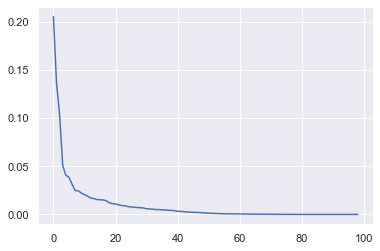

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=99)
temp_X = pca.fit_transform(big_X)

variances = pca.explained_variance_ratio_
# print(variances)

variance_plot = sns.lineplot(data = variances, markers = True)
plt.show()

In [18]:
pca = PCA(n_components=10)
X = pca.fit_transform(big_X)
X.shape

(8124, 10)

Now we have the columns in their correct places and the dimensions of X reduced, lets shuffle them around, and then split them into the correct Test and Train sets.
Note that the ratio of columns assigned to the train set and the test set can be changed by changing the variable `train_ratio` 

We split the data using a stratified splitter into train and tests. But have also shuffled the entire X,y dataset Dataframes. This is so that they can be used for cross validation.

We have the version of the splitter to **stratify** the random splitting. This way the proportions of examples in both classes for y is maintained in both splits 

In [19]:
from sklearn.model_selection import train_test_split
test_ratio = 0.2


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = 0, stratify = y)

indices = np.arange(cleanDataset.shape[0])
rng = np.random.RandomState(0)
permuted_indices = rng.permutation(indices)
X = X[permuted_indices]
y = y[permuted_indices]


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6499, 10) (6499,)
(1625, 10) (1625,)


In [20]:
def Counts(ArrayToCount):
    vals, count = np.unique(ArrayToCount, return_counts=True)
    return (dict(zip(vals, count)))

print(Counts(y_test))
print(Counts(y_train))

{0: 783, 1: 842}
{0: 3133, 1: 3366}


Now we have split the data into all the seperate parts. 
- `X_train`
- `X_test`
- `y_train`
- `y_test`

**note** that these can now be used for training and testing, although if any alterations happen during the algorithms themselves, be sure to copy these into a local variable so that in the end we are able to run all of the algorithms with one simple click.

# Logistic Regression copied from slides



In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report

# Train the model 

LogReg = LogisticRegression() 
LogReg.fit(X_train, y_train) 

# Evaluate on training set 
train_acc = LogReg.score(X_train, y_train) 
print("The Accuracy for Training Set is {}".format(train_acc*100)) 

y_pred = LogReg.predict(X_test)

# Evaluate on test set 
test_acc = accuracy_score(y_test, y_pred) 
print("The Accuracy for Test Set is {}".format(test_acc*100)) 

# Generate classification report 
print(classification_report(y_test, y_pred))

The Accuracy for Training Set is 92.87582705031542
The Accuracy for Test Set is 93.16923076923077
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       783
           1       0.93      0.94      0.93       842

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



# K-nearest callable function
neighbors default is 5, so this is a reasonable value to pass in


In [22]:
def knearest(X_train, y_train, X_test, neighbors, distance_metric):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=distance_metric)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    return y_pred



knearest_pred = knearest(X_train, y_train, X_test, 2, 'euclidean')
print (knearest_pred)

test_acc_k_nearest = accuracy_score(y_test, knearest_pred) 
print("The Accuracy for Test Set is {}".format(test_acc_k_nearest*100)) 

# Generate classification report 
print(classification_report(y_test, knearest_pred))

[1 1 1 ... 0 0 1]
The Accuracy for Test Set is 99.87692307692308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Decision Tree procedure

In [25]:
def decision_tree_procedure():
    #Libraries used :
    import pandas as pd
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    #(for OneHotEncoding)
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder

    #Creating a dataframe called "df" using the data from mushrooms.csv
    df = pd.read_csv('./mush.csv')
    
    #Creating a list of all column_names from the 1st row in the dataset.
    #Used in OneHotEncoding
    column_names = "edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat"
    column_names_list = column_names.split(",")

    #Creating a new dataframe X by copying the original dataframe into it.
    X = df.copy()
    #Removing the answer column from the input dataframe X.
    #This is to prevent the model from learning the answers.
    del X["edibility"]

    #For future check - to see if OneHotEncoding has worked.
    #print("Old size of X: ", X.shape)

    #Generating a 2D array called unique_variable_values.
    #It will contain arrays in such way, that each array with index i has all unique variable values of column i in the dataset (for 0 <= i < number of columns).
    unique_variable_values = []
    first = True
    for col in df:
        if first:
            first = False
            continue
        unique_variable_values.append(list(df[col].unique()))    
    #To check if unique_variable_values array was generated correctly
    #print(unique_variable_values)

    #Using OneHotEncoder on X, creating a representation of our mushroom data set (contains nominal data only) that can be used in machine learning.
    ohe = OneHotEncoder(categories = unique_variable_values)
    X_new = ohe.fit_transform(X).toarray()
    #To check if OneHotEncoding has worked.
    #print("New X shape: ", X_new.shape)

    #Setting up y to contain the answer column. In our case each row will either say "Edible" or "Poisonous"
    y = df["edibility"]
    #Performing a test-train split on y and X.
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, shuffle=True)
    #Setting shuffle to True to make sure the data is split randomly.
    #This prevents unintentional bias 

    pipeline = Pipeline([
        ('clf', DecisionTreeClassifier(criterion = 'entropy'))
    ])

    #Limiting the depth of the tree to be used to prevent overfitting.
    #With [clf__max_depth': (5, 6)] we aleady get 1.00 for f1 score.
    #f1 starts going below 1.00 at ['clf__max_depth': (4, 5)]. At this setting f-1 is 0.99
    parameters = {
        'clf__max_depth': (5, 6),
        'clf__min_samples_split': (2, 3),
        'clf__min_samples_leaf': (1, 2, 3)
    }

    #Creating the machine learning model with decision trees using GridSearchCV
    grid_search_model = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
    grid_search_model.fit(X_train, y_train)
    
    print('Best score: %0.3f' % grid_search_model.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search_model.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print('t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search_model.predict(X_test)

    #Priting model evaluation based on its f1 score.
    print(classification_report(y_test, predictions))

In [26]:
decision_tree_procedure()

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best score: nan
Best parameters set:
tclf__max_depth: 5
tclf__min_samples_leaf: 1
tclf__min_samples_split: 2
              precision    recall  f1-score   support

      EDIBLE       1.00      1.00      1.00      1150
   POISONOUS       1.00      1.00      1.00       954

    accuracy                           1.00      2104
   macro avg       1.00      1.00      1.00      2104
weighted avg       1.00      1.00      1.00      2104

